# Workshop 2 - Apply
    
In this notebook you will solve a 2-element frame at the end of the notebook.

Our matrix method implementation is now completely stored in a local package, consisting of three classes.

## Two-element frame

<figure>
  <IMG SRC="https://raw.githubusercontent.com/ibcmrocha/public/main/twoelemframe.png" WIDTH=300 ALIGN="center">
</figure>

With:
- $EI = 1500$
- $EA = 1000$
- $q = 9$
- $L = 5$
- $\bar\varphi = 0.15$

The final example of this notebook is the two-element frame above. Here you should make use of all the new code you implemented:
    
- Set up the problem and compute a solution for `u_free`. Remember to consider the prescribed horizontal displacement $\bar{u}$ at the right end of the structure.
- Compute and plot bending moment lines for both elements (in the local and global coordinate systems)
- Compute reactions at both supports

In [1]:
import numpy as np
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [2]:
EI = 1500
EA = 1000
q = 9
L = 5
phi_c = 0.15

mm.Node.clear()
mm.Element.clear()

#creating nodes
node1 = mm.Node (0,0)
node2 = mm.Node (L,-L)
node3 = mm.Node (2*L,0)

nodes = [node1, node2, node3]

#creating elements
elem1 = mm.Element(node1, node2)
elem2 = mm.Element(node2, node3)

elems = [elem1, elem2]

for elem in [elem1, elem2]:
    sec = {'EI': EI, 'EA': EA}
    elem.set_section(sec)

elem1.add_distributed_load([0, q])
elem2.add_distributed_load([0, 2*q])

# print(elem1)
# print(elem2)

#Set Boundary conditions
con = mm.Constrainer()

con.fix_dof(node1,0)
con.fix_dof(node1,1)
con.fix_dof(node3,0)
con.fix_dof(node3,1)
con.fix_dof(node3,2, value = phi_c)

print(con)

This constrainer has constrained the degrees of freedom: [0, 1, 6, 7, 8] with corresponding constrained values: [0, 0, 0, 0, 0.15])


In [3]:
ndofs = 3 * len(nodes)

global_k = np.zeros((ndofs, ndofs))
global_f = np.zeros(ndofs)

for elem in elems:
    elmat = elem.stiffness()
    idofs = elem.global_dofs()
    
    global_k[np.ix_(idofs,idofs)] += elmat

for node in nodes:
    global_f[node.dofs] += node.p

K_ff, F_new = con.constrain (global_k, global_f)
u_f = np.matmul (np.linalg.inv(K_ff), F_new)
print(f'U_f = {u_f}')

print(f'Support reactions = {con.support_reactions(global_k,u_f,global_f)}')

U_f = [-0.09274451 -0.13310939  0.51159348 -0.01644455]
Support reactions = [ 27.35024439 -63.82451092  17.64975561 -71.17548908 -36.75489076]


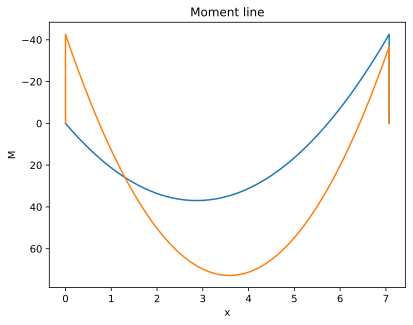

In [4]:
for elem in elems:
    u_elem = con.full_disp(u_f)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=50)

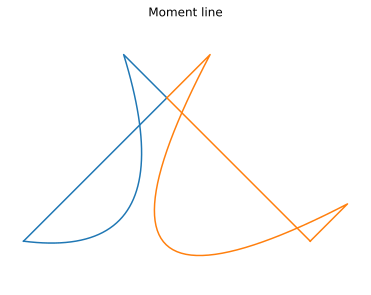

In [5]:
for elem in elems:
    u_elem = con.full_disp(u_f)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=50, global_c=True,scale=0.05)

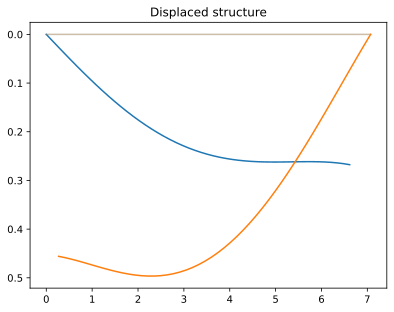

In [6]:
for elem in elems:
    u_elem = con.full_disp(u_f)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=50)

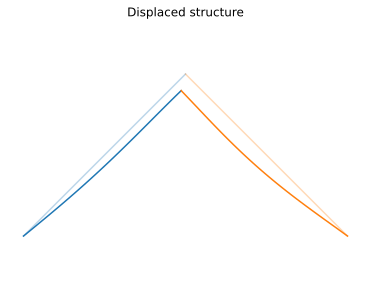

In [7]:
for elem in elems:
    u_elem = con.full_disp(u_f)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=True,scale=1)

For the given parameter values, if your implementation is fully correct, you should get the following nodal displacements and support reactions:
$$
\mathbf{u}_\mathrm{free} = \left[-0.09274451, -0.13310939,  0.51159348, -0.01644455\right]
$$

$$
\mathbf{f}_\mathrm{cons} = \left[27.35024439, -63.82451092,  17.64975561, -71.17548908, -36.75489076\right]
$$

You should also get the following moment lines for the two elements:

- in local coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/moments_local.svg)

- in global coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/moments_global.svg)

And the following displacements:
- in local coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/displacements_local.svg)

- in global coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/displacements_global.svg)